## Todays exercise - the maximum number of points you can acheive is 100. The points are dispersed throughout the exercises : 
Based on the content of the lecture today you should be able to solve the following notebook and answer the questions. When you are asked to explain somethin please **do not** copy/paste but always use your own words (you will not be given points for copy/paste answers!)

You can write with questions at any time, however, help will mainly be available in the hours allocated after lecture, BUT:

If you are not able to immediately answer something please look in the relevant links to the sickit-learn documentation that are provided throughout the notebook. 

If there is not a relevant link for the question, PLEASE try to google before asking. You will learn more and work faster if you try to search out information for yourself. 


## Random Forest exercise

Random Forest on the N-terminus of proteins. The dataset cosists of two classes of proteins: Secretory and Non-secretory. The input consists of 20 features, which corresponds to the amino acid frequencies of the first 30 amino acids of a protein (N-terminal part). 
Here we are going to use Random forest to classify the proteins based on the amino acid frequencies of the first 30 residues.

### Import all the packages that we are going to need



In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import ParameterGrid
import random
import pandas as pd
import seaborn as sns

### Q1 (2 points): First we need to load some data. We load in a test data set and a training data set. The test data set will not be used for training the random forest. Both data sets contain measured frequency data values and the belonging labels, that is whether Sectretory or Non-Secretory. 

The data we will be using here is the data we generated and clustered the other day with CD-hit!  

**You will be figuring out yourself how to load the data.**  

**Hints:** 1) you have to think about what kind of file you are dealing with, 2) one of the libraries loaded into your environment might have a useful loading package (or check out numpy loading packages)

In [14]:
# command to make symbolic link
%cd
%cd ml_data
!ln -s /exercises/ml_intro/ml_data/freq_train.txt ./freq_train.txt
!ln -s /exercises/ml_intro/ml_data/freq_val.txt ./freq_val.txt 
!ln -s /exercises/ml_intro/ml_data/label_train.txt ./label_train.txt
!ln -s /exercises/ml_intro/ml_data/label_val.txt ./label_val.txt 
!pwd
!ls


/home/jupyter-freddie2
/home/jupyter-freddie2/ml_data
ln: failed to create symbolic link './freq_train.txt': File exists
ln: failed to create symbolic link './freq_val.txt': File exists
ln: failed to create symbolic link './label_train.txt': File exists
ln: failed to create symbolic link './label_val.txt': File exists
/home/jupyter-freddie2/ml_data
freq_train.txt	freq_val.txt  label_train.txt  label_val.txt


##### Below are the names of the files use these strings to load the data (you have loaded such files before with numpy)

`'freq_train.txt'`

`'freq_val.txt'`

`'label_train.txt'`

`'label_val.txt'`

In [15]:
X_train = ?
y_train = ?
X_test = ?
y_test = ?

SyntaxError: invalid syntax (<ipython-input-15-54c11c4e324b>, line 1)

#### Answer  


In [16]:
X_train = np.loadtxt('freq_train.txt') 
y_train = np.loadtxt('label_train.txt')
X_test = np.loadtxt('freq_val.txt') 
y_test = np.loadtxt('label_val.txt')

##### Now we can define the random forest model. 
##### Go to the sklearn random forest (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) website and find out how to set up and train a random forest!
##### Pay attention to the tunable parameters in the model and note them down? Which do you think are most important



### Q2 (6 points): Set up the random forest model and fit it to the training data. Explain the process.

In [6]:
# set up the model:
rf_model = ??
# train the model:
??

SyntaxError: invalid syntax (<ipython-input-6-281569a488f0>, line 2)

#### Answer

In [8]:
# model
rf_model = RandomForestClassifier(n_estimators = 100)
# training
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Next we will use the trained model to make predictions! 
**It is important to have a metric to evaluate the performance of the model. In this case we will calculate the accuracy and show the confusion matrix.**
### Q3 (6 points): Explain what accuracy (ACC) and confusion matrix represents. How would these look for a random model and a perfect model?
**Hint:** How are the True positive & true negative related to accuracy


### Q4 (5 points): Report ACC and confusion matrix values!
##### Link for confusion matrix visualization (https://tatwan.github.io/How-To-Plot-A-Confusion-Matrix-In-Python/)

In [9]:
# use the model to make predictions: 
y_test_pred = ??
# accuracy:
acc = ??
print("Accuracy: " + str(round(acc,3)))
# calculate confusion matrix:
cm = ??

SyntaxError: invalid syntax (<ipython-input-9-039efc104adb>, line 2)

#### Answer

In [17]:
# making predictions:
y_hat = rf_model.predict(X_test)
# calculate accuracy:
acc_self = np.mean(y_hat == y_test)
# using built-in score to calculate accuracy:
acc_sklearn = rf_model.score(X_test, y_test)
# using accuracy score from metrics:
acc_metrics = accuracy_score(y_test, y_hat)
print(acc_self, acc_sklearn, acc_metrics)

# confusion matrix: 
cm = confusion_matrix(y_test, y_hat)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
print(tn, fp, fn, tp)

0.9032786885245901 0.9032786885245901 0.9032786885245901
[[333  27]
 [ 32 218]]
333 27 32 218


### Let's visualize the confusion matrix for better understanding
### Q5 (2 point): **Most of the code is already written BUT you need to add the correct labels to the x and y axis**

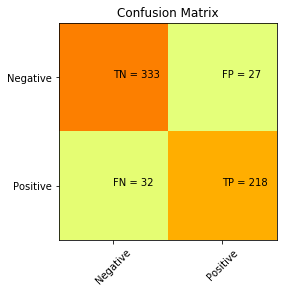

In [18]:
# visualize confusion matrix:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia) 
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
tick_marks = np.arange(len(classNames)) 
plt.xticks(tick_marks, classNames, rotation=45) 
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
# PLEASE ADD THE X AND Y AXIS LABELS BELOW:


for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Answer:

Text(0.5, 0, 'Predicted label')

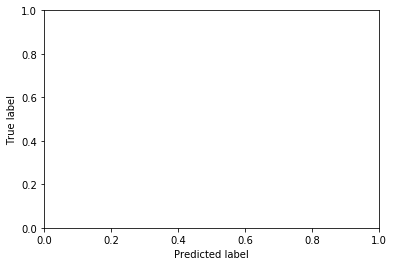

In [19]:
# to plot the x y labels. 
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Q6 (2 points): Describe what you see

### Now we will investigate how the number of trees influences the random forest accuracy! 
### Q7 (2 points): finish the code below. Is the number of trees a hyperparameter? 

In [21]:
# test different number of trees: 
number_trees=[1,5,10,50,100,150,200]
perf=[]
for n in number_trees: # set up the model: 
    rf_model = ??
    # train the model:
    ??
    # predict:
    y_test_pred = ??
    # calculate ACC:
    perf.append(accuracy_score(y_test, y_test_pred))

# visualize result:
plt.plot(number_trees,perf)
plt.xlabel('number of trees')
plt.ylabel('performance in AUC')
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-c3ff426c6329>, line 5)

#### Answer

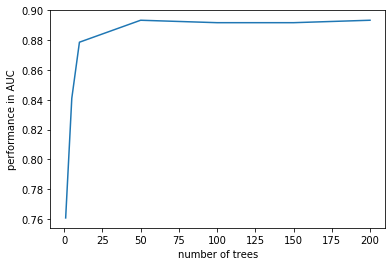

In [22]:
# test different number of trees: 
number_trees=[1,5,10,50,100,150,200]
perf=[]
for n in number_trees: # set up the model: 
    rf_model = RandomForestClassifier(n_estimators=n)
    # train the model:
    rf_model.fit(X_train, y_train)
    # predict:
    y_test_pred = rf_model.predict(X_test)
    # calculate ACC:
    perf.append(accuracy_score(y_test, y_test_pred))

# visualize result:
plt.plot(number_trees,perf)
plt.xlabel('number of trees')
plt.ylabel('performance in AUC')
plt.show()

### Q8 (1 point): How many trees do you need to achieve satisfactory performance?

#### Answer:
~ 50 trees

### Q9 (7 points): Explain for what reason having multiple decision trees (i.e. Random Forest) is better than having just one and how is the "randomness" in the random forest acheived? 

#### Answer:
- avoiding overfitting / better generalisation
- by bootstrapping/ bagging

### We can see that the number of trees in  the forest have an impact on performance. But there are other parameters we can tune as well!
#### Let's try to search for the optimal combination of values for a couple of parameters: number of trees, max depth of trees, max features. 
##### In this case we only test a few hyperparameters but keep in mind that there are more

### Q10 (7 points): First explain briefly in your OWN words what the hyperparameters control? (since you have already explained the number of trees now explain: max depth of trees, max features). Is there one or more other hyperparameters that we can tune to try to reduce overfitting?
**Hint:** Think about what you learned in the lecture today and look in the documentation http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

#### Answer:
- max depth: max depth for a tree 
- max features: the max number of features considered for each tree

To avoid overfitting:
- min_samples_split
- min_samples_leaf
- max_leaf_nodes


### To search for the optimal number of parameters we will do a grid search (i.e. we search a grid containing the possible combinations of hyperparameter values). This can be done manually but sklearn can also help with this .   
**You will need to code most of the hyperparameter tuning yourself but we will take it step by step** 

#### First we need to make a grid containing all the possible combinations of values for the hyperparameters we want to use
**Go to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html**


**Hint:** To generate an array for `n_trees` and `max_depth` we are using `np.arange()` you can read about `np.arange` here: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

### Q11 (5 points): make a parameter grid using the sklearn function `ParameterGrid`. How many different combinations are we searching?
**Hint**: to get the number of parameters think about how you get the length of a list or array. 

In [242]:
max_depth = list(np.arange(1, 101, 10))
max_depth.append(None)
n_trees = list(np.arange(1, 1001, 50))
max_features = ['auto', 'log2']

params = ? # here you need to go to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html and read hot to do it 
param_grid = ParameterGrid(params)

SyntaxError: invalid syntax (<ipython-input-242-7090b2e2befa>, line 6)

#### Answer:

In [26]:
max_depth = list(np.arange(1, 101, 10))
max_depth.append(None)
n_trees = list(np.arange(1, 1001, 50))
max_features = ['auto', 'log2']
params = {'n_trees': n_trees, 'max_depth' : max_depth, 'max_features': max_features} 
param_grid = list(ParameterGrid(params))
print('Number of combinations:' , len(param_grid))

Number of combinations: 440


### Q12 (3 points): why are we only testing 2 options for `max_features` when there are three: 'auto', 'sqrt', 'log2'

#### Answer

Because auto and sqrt are the same

### Usuallly we would have to test more than 3 hyperparameters which would result in a huge number of combinations. Then it will take way to long to search all the combinations to test. We can narrow in out search in 2 ways:
- do a rough search with bigger steps. Then search more thoroughly around the best performing combination.
- pick a number of random combinations to test. Then search more thoroughly around the best performing combination.

### Here we will do the latter. We will pick out 100 random combinations and search those:

In [27]:
random_params = random.sample(param_grid, 100)

### Now we will find the optimal combination of hyperparameters in the random set.   
**Usually for this proccess we would use k-fold cross validation, but today we are simply using the train and validation set** 
### Q13 (5 points): For what purpose were we making sure that the sequences in the training and validation datasets are not too similar? 
**In cross validation we would also make sure that the partitions are not too similar**

#### Answer

In order to not have data leaking between the training and validation partitions

### Q14 (4 points): What are some reason/advantages for usually using cross validation. 

#### Answer: 

- Using all the data 
- better out-of-sample error estimation 


### Q15 (8 points): Inspired by the code used to search for the optimal number of trees train and predict using each of the combinations in the `random_params`


**Hint:** You can loop through the `random_params` and get the value of e.g. n_trees in that combination of hyperparameters by:  

` for p in random_params:   
     n_trees = p['n_trees']`

**Hint:** Save the accuracy on the validation set of the model for each combination of the hyperparameters.



In [28]:
performance = []

for params in random_params:
    # write the rest of the loop yourself. 

SyntaxError: unexpected EOF while parsing (<ipython-input-28-23fdd87d7185>, line 4)

#### Answer:

In [29]:
performance = []

for params in random_params:

    rf_model = RandomForestClassifier(n_estimators= params['n_trees'], max_depth=params['max_depth'], 
                                      max_features=params['max_features'])
    # train model 
    rf_model.fit(X_train, y_train)
    # predict 
    y_test_pred = rf_model.predict(X_test)
    # calucalate accuracy 
    acc = accuracy_score(y_test, y_test_pred)
    performance.append(acc)

### Q16 (4 points): What combination of hyperparameters give the highest accuracy? Do you think this accuracy significantly better than the one for the default model (the first you trained). 


In [30]:
max_acc = max(performance)
i = performance.index(max(performance))
original_acc = ? # put the accuracy of your original model here
print('origninal accuracy:' ,original_acc, 'new max accuracy:', np.round(max_acc, 3), ', Parameter values:' , param_grid[i])

SyntaxError: invalid syntax (<ipython-input-30-132b3eec3318>, line 3)

#### Answer: 

In [ ]:
max_acc = max(performance)
i = performance.index(max(performance))
original_acc = 0.9
print('origninal accuracy: 0.893,', 'new max accuracy:', max_acc, ', Parameter values:' , param_grid[i])

No it is 1% higher only. 

### Let us take a look at the top 10 settings:

In [ ]:
highest_perf = sorted(range(len(performance)), key = lambda sub: performance[sub], reverse=True)[:10] 

for i in highest_perf:
    print('accuracy:', performance[i], random_params[i] )



### Repeat the exercise narrowing in on the best parameter settings: 
We can see that there is actually quite a bit of variation in the best performing parameters. Let us narrow in the search according to the best performing hyperparameters (Be aware that your results may be slightly different, but still use the narrowed down search as below)
- n_trees from 150-250 (stepsize 10)
- max depth from 20-50 + None (stepsize 5)

In [250]:
max_depth = list(np.arange(15, 70, 5))
max_depth.append(None)
n_trees = np.arange(150, 250, 10)
params = ? 
param_grid = ?

performance = []
for params in param_grid:

    # code the rest yourself


SyntaxError: invalid syntax (<ipython-input-250-fbd697ddb43a>, line 4)

### Q17 (9 points) : Report the best accuracy and the hyperparameters

#### Answer:

In [ ]:
max_depth = list(np.arange(20, 50, 5))
max_depth.append(None)
n_trees = np.arange(150, 250, 10)
params = {'n_trees': n_trees, 'max_depth' : max_depth, 'max_features': ['auto', 'log2']} 
param_grid = list(ParameterGrid(params))

# training
performance = []
for params in param_grid:

    rf_model = RandomForestClassifier(n_estimators= params['n_trees'], max_depth=params['max_depth'], 
                                      max_features=params['max_features'])
    # train model 
    rf_model.fit(X_train, y_train)
    # predict 
    y_test_pred = rf_model.predict(X_test)
    # calucalate accuracy 
    acc = accuracy_score(y_test, y_test_pred)
    performance.append(acc)
max_acc = max(performance)
i = performance.index(max(performance))
print('origninal accuracy: 0.89,', 'new max accuracy:', max_acc, ', Parameter values:' , param_grid[i])

### Q18 (4 points): Now let's have a look at the feature importance reported by the random forest. Begin by training a random forest with the optimal hyperparameters. Next, extract the feature importance and visualize which genes are important for determining whether Sectretory or Non-sectretory.

In [31]:
aa_labels = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


#setupandfitthemodel: 
n_trees = ?
max_features = ?
max_depth = ?


rf_model = RandomForestClassifier(n_estimators=n_trees, max_features=max_features, max_depth =max_depth)
rf_model.fit(X_train, y_train)
# visualize importance per position:
feature_imp = rf_model.feature_importances_
feature_imp = np.reshape(feature_imp, [-1,1])
# show feature importance per amino acid as boxplot:
plt.bar(np.arange(len(aa_labels)),feature_imp[:,0])
plt.xlabel('amino acid')
plt.ylabel('importance')
tick_marks = np.arange(len(aa_labels))
plt.xticks(tick_marks, aa_labels) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-31-3bea352049d4>, line 5)

#### Answer:

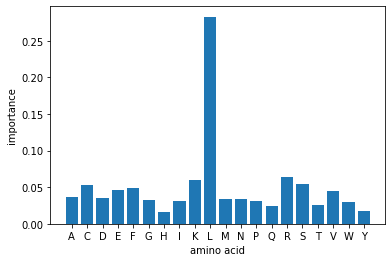

In [32]:
aa_labels = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


#setup and fit the model: 
n_trees = 150
max_features = 'log2'
max_depth = 40


rf_model = RandomForestClassifier(n_estimators=n_trees, max_features=max_features, max_depth =max_depth)
rf_model.fit(X_train, y_train)
# visualize importance per position:
feature_imp = rf_model.feature_importances_
feature_imp = np.reshape(feature_imp, [-1,1])
# show feature importance per amino acid as boxplot:
plt.bar(np.arange(len(aa_labels)),feature_imp[:,0])
plt.xlabel('amino acid')
plt.ylabel('importance')
tick_marks = np.arange(len(aa_labels))
plt.xticks(tick_marks, aa_labels) 
plt.show()

### Q19 (2 points): Which features are more important than others?

### Q20 (3 points): What is the biological interpretation of the barplot?

### Q21 (5 points): look in day 2 exercises - we did a boxplot for the amino acid frequencies for secretory vs non-secretory. Make this boxplot again.
### Does the random forest feature importance validate that plot? What do the labels `0` and `1` signify biologically?

In [33]:
# make a dataframe
df = ? 
df['label'] = y_train
# use pd.melt to change the shape of the dataframe 
# use sns.boxplot to plot https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(data = pd.melt(df, id_vars='label'), x = 'variable', y='value', hue='label')

SyntaxError: invalid syntax (<ipython-input-33-b67fb2789ad4>, line 2)

#### Answer: 

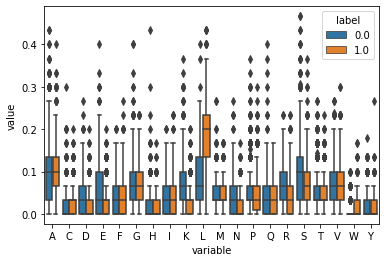

In [34]:
df = pd.DataFrame(X_train, columns = aa_labels)
df['label'] = y_train
sns.boxplot(data = pd.melt(df, id_vars='label'), x = 'variable', y='value', hue='label')

### Q23 (2 points): what is the Out-of-bag error?

#### Answer:
The error calculated with the samples not used for building the tree in the bootstrapping proccess